In [1]:
from random import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('/Users/fate/Desktop/Bachelor/employementAnalysis/project/latestData.tsv', 'r', encoding='utf-8') as file:
    app_lines = file.read().split('\n')

df = pd.read_csv(
    '/Users/fate/Desktop/Bachelor/employementAnalysis/project/latestData.tsv', sep='\t')
print(len(df))

9174


In [3]:
def cleanSalary(salary) -> float:
    if(isinstance(salary, str)):
        return float(salary.replace(',', ''))
    return None


def cleanDealable(deal) -> bool:
    if(deal == 'Тохиролцоно'):
        return True
    return False

def normalizeDataSet(data_set):
    ret = pd.DataFrame(columns=['employee', 'jobTitle', 'level', 'minSalary',
                       'maxSalary', 'isDealable', 'city', 'district'])
    for index, row in df.iterrows():
        minSalary = cleanSalary(row['Min Salary'])
        maxSalary = cleanSalary(row['Max Salary'])
        if minSalary is None and maxSalary is None:
            continue
        dealable = cleanDealable(row['Is Dealable'])
        ret = ret.append({'branch': row['Category Name'],
                          'employee': row['Employee Company'],
                          'jobTitle': row['Title'],
                          'level': row['Level'],
                          'minSalary': minSalary,
                          'maxSalary': maxSalary,
                          'isDealable': dealable,
                          'city': row['City/Province'],
                          'district': row['District']
                          }, ignore_index=True)
    return ret

In [ ]:
data_set = normalizeDataSet(df)

In [5]:
print(len(data_set))
data_set.to_csv('data.csv')

9035


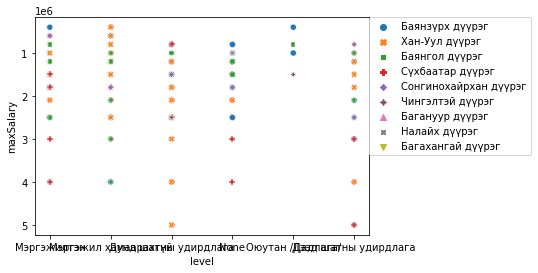

In [10]:
sns.scatterplot(data=data_set, x="level", y="maxSalary", hue="district",style="district")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

In [25]:
sns.histplot(data=data_set, x='maxSalary', hue = 'district')

TypeError: The y variable is categorical, but one of ['numeric', 'datetime'] is required

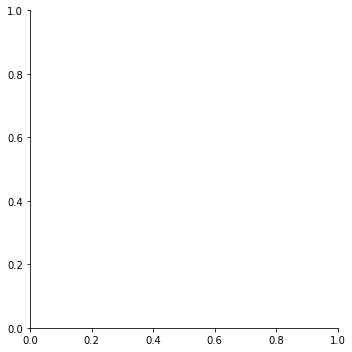

In [13]:
sns.displot(data=data_set, x="maxSalary", hue="district", kind='kde')